# Pendahuluan


**By Indra Muliadi** | [LinkedIn](https://www.linkedin.com/in/indra-muliadi/) | [GitHub](https://github.com/indramuliaa)

Selamat datang! Notebook ini dibuat sebagai dokumentasi pribadi dari project BDC Satria Data 2022 yang sudah dikerjakan. Dokumen ini juga dibagikan kepada teman-teman sebagai bahan pembelajaran dan pengetahuan untuk perlombaan Satria Data selanjutnya. Di sini, Anda akan menemukan informasi dan panduan tentang kompetisi, serta langkah-langkah yang kami ambil dalam menyelesaikan tantangan.

**Note :** Notebook ini tidak memuat seluruh langkah dan proses yang kami lakukan pada BDC 2022, tetapi prosesnya disederhanakan dan penjelasan sedetail mungkin agar lebih mudah dipahami sebagai referensi pembelajaran.


Link ke google colab ini dapat diakses [disini](https://colab.research.google.com/drive/1nBDFdii5RxaCJ-qOzEnn4oYNc177Lt9L?usp=sharing).



# Satria Data 2022



Untuk keperluan mengefektifkan pengelolaan anggaran BPJS Kesehatan, maka pada lomba BDC Satria Data 2022 peserta ditantang untuk melakukan prediksi status pulang peserta berdasarkan data FKTP BPJS Kesehatan. Bangun pemodelan untuk klasifikasi status pulang peserta menjadi “Sehat” dan “Belum_Sehat” dengan memanfaatkan data train. Kemudian lakukan prediksi kelas status pulang peserta pada data test. Panduan lebih lengkap dapat diakses [disini](https://docs.google.com/presentation/d/1jKw0q8ntvFWDw5aavLumclTt9xgr98Eh/edit?usp=sharing&ouid=107630577985843450829&rtpof=true&sd=true).
<br><br>

Seluruh resources yang diperlukan dapat diakses pada [Google Drive](https://drive.google.com/drive/folders/10Fc_thD_9QgJcX96bkV3srUGKMQwTnjx?usp=drive_link) atau [GitHub repository](https://github.com/indramuliaa/bdc-satria-data-2022).

# Library yang digunakan

Starter library yang digunakan adalah **pandas**, **numpy**, dan **matplotlib**. **pandas** dan **numpy** digunakan untuk processing data, sedangkan **matplotlib** digunakan untuk visualisasi data. Selain itu, nantinya akan dipakai library **scikit learn** untuk processing dan pembuatan model dan library **csv** untuk pembuatan file `submission.csv`.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Dataset yang digunakan

Data yang digunakan dalam BDC 2022 merupakan catatan kunjungan dari peserta BPJS Kesehatan ke Fasilitas Kesehatan Tingkat Pertama (FKTP) selama tahun 2015 hingga 2020. Data kunjungan FKTP BPJS Kesehatan disimpan dalam format plain text `.txt`, antar cell data dipisahkan dengan koma. Urutan cell dari kiri ke kanan, sesuai dengan nama variabel yang tersedia dalam file [metadata](https://docs.google.com/spreadsheets/d/1NJDDApdsrmU0HEupNYiWYgweZuIjb289/edit?usp=sharing&ouid=107630577985843450829&rtpof=true&sd=true).

- [Data train FKTP](https://drive.google.com/file/d/1x2R5SvtNn1BOvsPpsFXgPK2Xt2D6RCeR/view?usp=sharing) yang disimpan dalam `train_fktp.txt` : Data ini berisi 4,056,898 baris data kunjungan dengan 26 kolom, termasuk kolom target. 

- [Data test FKTP](https://drive.google.com/file/d/1Z4ShBm7ln0dNSXstH8F7pNjJF6-MIhN-/view?usp=drive_link) yang disimpan dalam `test_fktp.txt` : Data ini berisi 1,014,225 baris data kunjungan yang harus diprediksi dengan model yang diperoleh peserta BDC. 

- [Pengumpulan](https://drive.google.com/file/d/18-7uiGlP19aNDKf2OXaRwycGKA6EjqHp/view?usp=sharing) : Peserta BDC mengumpulkan hanya hasil prediksi kelas status pulang peserta untuk data test dalam file berformat comma separated value (csv). Gunakan file `submission.csv` untuk mengumpulkan jawaban.


**Cara memasukkan dataset ke google colab** <br>
Terdapat banyak cara untuk mengimport dataset ke google colab dan perlu disesuaikan dengan ukuran file, sumber file, jenis file, dll. Berikut adalah salah satu contoh cara mendownload data dari google drive ke google colab:

1. Gunakan `!gdown` dengan sintaks seperti berikut

```
!gdown --id [id_drive]
```
`[id_drive]` diisi dengan id google drive file yang ingin didownload kedalam colab. Pastikan akses dari file tersebut sudah dibuka.

2. Setelah file berhasil didownload ke dalam google colab, selanjutnya file sudah dapat diakses pada direktori `/content`. Anda dapat membukanya dengan mengklik icon 📁 di sebelah kiri.

3. Jika berhasil didownload maka data sudah bisa digunakan lebih lanjut, misal membukanya dengan library **pandas** atau lainnya. 

4. Untuk melihat path file tersebut, anda dapat mengklik icon titik tiga di sebelah kanan file, kemudian pilih `copy path` atau `salin jalur`.


In [2]:
# import data training
! gdown --id 1x2R5SvtNn1BOvsPpsFXgPK2Xt2D6RCeR

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1x2R5SvtNn1BOvsPpsFXgPK2Xt2D6RCeR
To: /content/train_fktp.txt
100% 686M/686M [00:07<00:00, 94.5MB/s]


In [3]:
# import data testing
! gdown --id 1Z4ShBm7ln0dNSXstH8F7pNjJF6-MIhN-

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Z4ShBm7ln0dNSXstH8F7pNjJF6-MIhN-
To: /content/test_fktp.txt
100% 159M/159M [00:02<00:00, 61.9MB/s]


In [4]:
# import data submission
! gdown --id 1pBGQJIuRqHnWaqEuyYpRrZbbR-qd6s7N

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1pBGQJIuRqHnWaqEuyYpRrZbbR-qd6s7N
To: /content/submission.csv
100% 29.0M/29.0M [00:00<00:00, 62.4MB/s]


setelah data berhasil didownload. Data dapat diolah lebih lanjut, seperti berikut data dibaca menggunakan library **pandas**. Perhatikan bahwa `column_names` dibawah merupakan nama kolom yang terdapat pada [metadata](https://docs.google.com/spreadsheets/d/1NJDDApdsrmU0HEupNYiWYgweZuIjb289/edit?usp=sharing&ouid=107630577985843450829&rtpof=true&sd=true) yang akan diinputkan menjadi nama kolom pada file `.csv` yang secara defaultnya tidak memiliki nama kolom.

In [5]:
# Nama kolom berdasarkan metadata
column_names = ["PSTV01", "PSTV02", "PSTV15", "FKP02", "FKP03", "FKP04",       
               "FKP05", "FKP06", "FKP07", "FKP08", "FKP09", "FKP10",
               "FKP11", "FKP12", "FKP14", "FKP14A", "FKP15", "FKP15A",
               "FKP16", "FKP17", "FKP18", "FKP19", "FKP20", "FKP21", "FKP22",
               "FKP13Class"]

# Membaca data train menggunakan pandas
train_df = pd.read_csv("train_fktp.txt", names=column_names)
train_df.head()

,PSTV01,PSTV02,PSTV15,FKP02,FKP03,FKP04,FKP05,FKP06,FKP07,FKP08,...,FKP15,FKP15A,FKP16,FKP17,FKP18,FKP19,FKP20,FKP21,FKP22,FKP13Class
0,157978748.0,50765420,20.064983,958073632,2019-08-01,2019-08-01,61,6108,3,1,...,9999,9999,98,9998,98,98,98,98,2,Sehat
1,95085112.0,26931775,2.626307,449590620P000054,2020-06-17,2020-06-17,51,5171,9,3,...,K297,"Gastritis, unspecified",98,9998,98,98,98,98,1,Belum_Sehat
2,224470578.0,227368233,1.051830,467490619P000001,2019-06-01,2019-06-01,35,3516,9,2,...,Z309,"Contraceptive management, unspecified",98,9998,98,98,98,98,1,Belum_Sehat
3,63871289.0,62313678,364.741455,254321219Y002368,2019-12-21,2019-12-21,34,3402,3,1,...,I10,Essential (primary) hypertension,98,9998,98,98,98,98,1,Belum_Sehat
4,29915626.0,113446188,1.050523,88681119P000020,2019-11-04,2019-11-04,35,3509,3,1,...,I110,Hypertensive heart disease with (congestive) h...,98,9998,98,98,98,98,1,Belum_Sehat


In [6]:
# Membacata data test menggunakan pandas
test_df = pd.read_csv("test_fktp.txt", names = column_names)
test_df.head()

<ipython-input-6-f2d24557aab3>:2: DtypeWarning: Columns (3,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  test_df = pd.read_csv("test_fktp.txt", names = column_names)


,PSTV01,PSTV02,PSTV15,FKP02,FKP03,FKP04,FKP05,FKP06,FKP07,FKP08,...,FKP15,FKP15A,FKP16,FKP17,FKP18,FKP19,FKP20,FKP21,FKP22,FKP13Class
0,187883292.0,98048784,240.884842,954386050,2019-08-21,2019-08-21,31,3172,9,2,...,9999,9999,98,9998,98,98,98,98,2,NaN
1,123307139.0,20969999,47.378571,774246805,2019-02-12,2019-02-12,17,1705,3,1,...,9999,9999,98,9998,98,98,98,98,2,NaN
2,21416273.0,21416273,5.882927,1202010273,2020-03-27,2020-03-27,64,6402,3,1,...,9999,9999,98,9998,98,98,98,98,2,NaN
3,97630052.0,97630052,172.916031,1286640248,2020-07-30,2020-07-30,18,1872,9,2,...,9999,9999,98,9998,98,98,98,98,2,NaN
4,124531163.0,124531163,187.203140,1285179242,2020-07-28,2020-07-28,18,1809,9,2,...,9999,9999,98,9998,98,98,98,98,2,NaN


In [7]:
# Membaca submission.csv
submission = pd.read_csv("submission.csv")
submission.rename({'Unnamed: 0': ''}, axis=1, inplace=True)
del submission["Status"]
submission.head()

<ipython-input-7-75fb9922b97d>:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  submission = pd.read_csv("submission.csv")


,,FKP02
0,1,954386050
1,2,774246805
2,3,1202010273
3,4,1286640248
4,5,1285179242


# Exploratory Data Analysis (EDA)
Analisis data eksploratif adalah metode yang digunakan dalam analisa data untuk memahami karakteristik dasar dari data yang tersedia. Tujuannya adalah untuk memahami lebih dalam tentang data secara umum sebelum dilakukan analisis lebih lanjut ataupun pembuatan model. Pembuatan visualisasi data sangat penting untuk membantu memvisualisasikan pola dan hubungan dalam data. Pada kasus ini kami tidak melakukan banyak eksplorasi pada data, namun fokus kami adalah mencari tahu hal-hal yang sekiranya diperlukan dalam pengolahan data lebih lanjut.


In [8]:
# menghitung ukuran dataset
train_df.shape

(4056898, 26)

data memiliki 4056898 baris data dan 26 kolom. Berdasarkan jumlah baris dan kolom nya data ini termasuk data yang cukup besar.

In [9]:
# Menghitung jumlah data hilang pada data train
print(train_df.isnull().sum())

PSTV01              0
PSTV02              0
PSTV15              0
FKP02               0
FKP03               0
FKP04               0
FKP05               0
FKP06               0
FKP07               0
FKP08               0
FKP09               0
FKP10               0
FKP11               1
FKP12               0
FKP14               0
FKP14A        1380241
FKP15               0
FKP15A              0
FKP16               0
FKP17               0
FKP18               0
FKP19               0
FKP20               0
FKP21               0
FKP22               0
FKP13Class          0
dtype: int64


In [10]:
# Menghitung jumlah data hilang pada data test
print(test_df.isnull().sum())

PSTV01              0
PSTV02              0
PSTV15              0
FKP02               0
FKP03               0
FKP04               0
FKP05               0
FKP06               0
FKP07               0
FKP08               0
FKP09               0
FKP10               0
FKP11               0
FKP12               0
FKP14               0
FKP14A         345912
FKP15               0
FKP15A              0
FKP16               0
FKP17               0
FKP18               0
FKP19               0
FKP20               0
FKP21               0
FKP22               0
FKP13Class    1014225
dtype: int64


pada kedua data train dan test terdapat missing data yang cukup banyak pada kolom `FKP14A`. Jika mengacu pada metadata, kolom tersebut berisi kode diagnosis ICD 10. Karena kolom ini mengandung missing data sangat banyak, maka kolom ini dapat dihapus saja. Sedangkan pada `FKP11` hanya terdapat 1 baris missing data, sehingga yang perlu dihapus hanya baris tersebut saja. Pada data train terlihat pada kolom `FKP13Class` keeseluruhan berisi missing data, hal ini karena kolom tersebut lah yang akan diprediksi dan kemudian dikumpulkan dalam file submission.

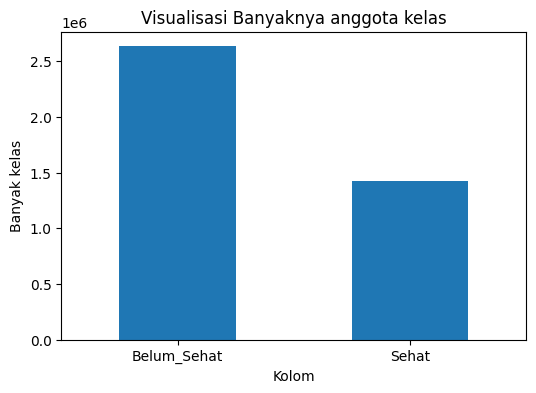

In [11]:
# Melihat distribusi pada kolom FKP13Class sebagai variabel dependen
distribusi_kelas = train_df['FKP13Class'].value_counts()
plt.figure(figsize=(6, 4))
distribusi_kelas.plot(kind='bar')
plt.xlabel('Kolom')
plt.ylabel('Banyak kelas')
plt.title('Visualisasi Banyaknya anggota kelas')
plt.xticks(rotation=0)
plt.show()


perhatikan bahwa banyak data pada kelas target (variabel dependen) tidak seimbang. Data dengan kelas "belum sehat" lebih banyak dibanding kelas "sehat". Ketidakseimbangan ini dapat menyebabkan masalah dalam pemodelan dan menghasilkan prediksi yang bias terhadap kelas mayoritas. Oleh karena itu perlu dilakukan langkah-langkah dalam mengatasi masalah dataset tidak seimbang ini pada preprocessing data. Terdapat beberapa cara diantaranya resampling, pembobotan, penggabungan, generasi sampel buatan, dan lain-lain. Pilihan metode yang tepat akan tergantung pada dataset dan masalah yang spesifik yang paling cocok untuk kasus Anda. Pada kasus ini kami akan menggunakan metode resampling undersampling dengan mengurangi jumlah sampel kelas mayoritas menjadi sama dengan kelas minoritas.

# Data Preprocessing


Data preprocessing adalah proses persiapan data sebelum dilakukan analisis atau pemodelan. Tujuan dari data preprocessing adalah untuk mengubah data mentah menjadi data yang siap digunakan. Berberapa teknik yang sering digunakan adalah cleaning, integration, transformation, dan reduction.

In [12]:
# Menghapus missing data pada kolom FKP11 di train df
train_df = train_df.dropna(subset=['FKP11'])


In [13]:
# Membuang kolom yang tidak penting
def remove_columns(df):
  removed_column = ['PSTV01', 'PSTV02', 'FKP02', 'FKP14A', 'FKP15', 'FKP15A']
  df = df.drop(removed_column, axis = 1)
  return df

train_df = remove_columns(train_df)
test_df = remove_columns(test_df)

terdapat beberapa kolom yang dihapus diantaranya `FKP14A` karena pada EDA sebelumnya menunjukkan banyak missing values. Kolom `PSTV01` `PSTV02` dan `FKP02` pada metadata menunjukkan nomor peserta, nomor keluarga dan ID kunjungan yang memuat nilai unique sehingga lebih baik dihapus saja. `FKP15` dan `FKP15A` juga dihapus karena tipe datanya tidak numerik.

In [14]:
# Menghitung lama inap pasien
def lama_inap(df):
  df[['FKP03','FKP04']] = df[['FKP03','FKP04']].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d %H:%M:%S.%f'))
  df["lama_inap"] = (df['FKP04'] - df['FKP03']) / np.timedelta64(1, "D")
  df = df.drop(['FKP03', 'FKP04'], axis = 1)
  return df

train_df = lama_inap(train_df)
test_df = lama_inap(test_df)

penambahan kolom `lama_inap` adalah bagian dari feature engineering dengan memanipulasi kolom `FKP03` dan `FKP04` yaitu tanggal datang dan tanggal keluar dengan tujuan mendapatkan fitur baru `lama_inap` yang mungkin lebih relevan dan informatif.

# Label Binarizer

Pada perintah pengumpulan hasil submission, status pasien diminta bernilai 1 untuk pasien "sembuh" dan 0 untuk pasien "belum sembuh". Oleh karena itu perlu dilakukan binarizer pada kolom `FKP13Class` untuk mengubah nilainya menjadi 0 dan 1.

In [15]:
# import modul labelbinarizer
from sklearn.preprocessing import LabelBinarizer

# membuat dan fit transform label binarizer
lb = LabelBinarizer()
train_df['FKP13Class'] = np.array(lb.fit_transform(train_df["FKP13Class"]))

In [16]:
# Cek apakah binarizer sudah tepat
print("1 :", lb.inverse_transform(np.array(1)))
print("0 :", lb.inverse_transform(np.array(0)))

1 : ['Sehat']
0 : ['Belum_Sehat']


bisa dilihat bahwa hasil binarizer nya sudah tepat dan dapat dilakukan pengolahan lebih lanjut.

# Mengatasi data tidak seimbang dengan undersampling

Berdasarkan hasil EDA sebelumnya menunjukkan bahwa variabel dependen memiliki kelas yang tidak seimbang yang perlu diatasi. Kami menggunakan Undersampling dengan beberapa pertimbangan diantaranya

- bertujuan mengurangi overfitting yang dikarenakan kelas mayoritas
- efisiensi komputasional dengan mengurangi jumlah sampel yang sangat besar

harap diperhatikan juga bahwa undersampling memiliki kelemahan yang disebabkan pengurangan jumlah sampel kelas mayoritas. Kita berpotensi kehilangan sebagian informasi dari kelas mayoritas yang dapat mempengaruhi kemampuan model dalam mempelajari pola yang mungkin ada dalam kelas tersebut. Namun harapannya hal tersebut tidak terjadi karena ukuran dataset yang sudah sangat besar sebanyak lebih dari 4 juta baris.

In [17]:
# Pisahkan variabel independen dan dependen terlebih dahulu
y = np.array(train_df["FKP13Class"])
X = np.array(train_df.drop("FKP13Class", axis = 1))

In [18]:
# Undersampling
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy = 'majority', random_state=2022)

X_under, y_under = undersample.fit_resample(X, y)

In [19]:
# Melihat ukuran kelas setelah undersampling
print(np.unique(y_under, return_counts=True)[1])

[1422386 1422386]


dapat dilihat setelah undersampling data variabel dependen antar kelas sudah seimbang.

# Membuat dan Train model

Sebelum membuat model, perlu dilakukan pembagian data menjadi train dan test. Tujuannya adalah agar dapat melakukan evaluasi terhadap kinerja model, melihat overfit dan underfit, dan banyak manfaat lainnya. Karena pada dataset sudah disediakan data test untuk submission, maka selanjutnya data hasil pembagian ini disebut validation data untuk menghindari ambiguitas dan multitafsir.

In [20]:
# Import module train_test_split untuk membagi data train dan test
from sklearn.model_selection import train_test_split

# Membagi dataset menjadi train dan valid dengan ukuran 80 : 20
X_train, X_valid, y_train, y_valid = train_test_split(X_under, y_under, test_size=0.2)

**RANDOM FOREST**

`Random Forest` adalah sebuah algoritma machine yang sangat populer dan efektif. Algoritma ini menggunakan konsep ensemble learning, di mana beberapa model `Decision Tree` digabungkan menjadi satu model yang lebih kuat. Prediksi akhir dalam Random Forest diperoleh dengan menggabungkan hasil dari semua pohon dalam ensemble. Untuk tugas klasifikasi, hasil prediksi akhir didasarkan pada mayoritas suara kelas yang diperoleh dari semua pohon. Kelebihan Random Forest termasuk kemampuannya dalam mengatasi overfitting, robust terhadap variabel yang tidak relevan dan noise dalam data, serta kemampuannya untuk menghasilkan pentingnya fitur (feature importance). Dengan demikian, Random Forest merupakan algoritma yang sangat berguna dan dapat diandalkan dalam berbagai jenis tugas pembelajaran mesin. Kelemahan model ini adalah performanya cukup lambat dan proses training lumayan lama dibanding `Decision Tree`, `Logistic Regression`, dll.


Untuk membuat model `Random Forest` di Python dapat menggunakan library `Scikit Learn`.

In [21]:
# Import modul RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Membuat model
rf_model = RandomForestClassifier(n_estimators=50, max_features="auto", random_state=1)
rf_model.fit(X_train, y_train)  # train model

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto', n_estimators=50, random_state=1)

In [22]:
# Melakan prediksi menggunakan data validation untuk evaluasi model
y_pred_valid = rf_model.predict(X_valid)
y_pred_valid

array([0, 1, 0, ..., 1, 0, 0])

In [23]:
# Import modul untuk evaluasi model
from sklearn.metrics import classification_report

# Melihat classification report
print(classification_report(y_valid, y_pred_valid, digits=8))

              precision    recall  f1-score   support

           0  0.99660170 0.99769449 0.99714779    284536
           1  0.99769101 0.99659657 0.99714349    284419

    accuracy                      0.99714564    568955
   macro avg  0.99714635 0.99714553 0.99714564    568955
weighted avg  0.99714624 0.99714564 0.99714564    568955



dari report diatas dapat dilihat metriks `precision`, `recall`, `f1-score`, `support` dan `accuracy`. Pengukuran yang dilakukan oleh juri BDC yang tercantum dalam panduannya adalah f1-score sehingga kita fokus pada f1-score pada kelas 1 yaitu 99.708276 %. Sehingga berdasarkan evaluasi tersebut menunjukkan bahwa model yang sudah dibuat memiliki kemampuan yang baik untuk memprediksi hasil klasifikasi dan model ini sudah bisa digunakan untuk prediksi data test untuk submission.

# Ekspor file submission 

Peserta BDC diminta mengumpulkan hasil prediksi kelas status pulang peserta untuk data test kemudian dimasukkan dalam file `submission.csv`. File `.csv` ini yang kemudian dikumpulkan ke website satria data.


In [24]:
# Mengambil data test dengan menghapus kolom FKP13Class
X_test = np.array(test_df.drop('FKP13Class', axis = 1))

# Melakukan prediksi
y_pred = rf_model.predict(X_test)
y_pred

array([1, 1, 1, ..., 0, 0, 0])

In [25]:
# Memasukkan hasil prediksi ke dalam tabel submission
submission["Status"] = y_pred
submission

,,FKP02,Status
0,1,954386050,1
1,2,774246805,1
2,3,1202010273,1
3,4,1286640248,1
4,5,1285179242,1
...,...,...,...
1014220,1014221,248870919P000406,0
1014221,1014222,116000620P000034,0
1014222,1014223,160421019P000631,0
1014223,1014224,332670919P000083,0


In [26]:
# Menyesuaikan submission dengan format yang diminta
submission[""] = submission[""].apply(lambda x: "" + str(x) + "")
submission["FKP02"] = submission["FKP02"].apply(lambda x: "" + str(x) + "")
submission

,,FKP02,Status
0,1,954386050,1
1,2,774246805,1
2,3,1202010273,1
3,4,1286640248,1
4,5,1285179242,1
...,...,...,...
1014220,1014221,248870919P000406,0
1014221,1014222,116000620P000034,0
1014222,1014223,160421019P000631,0
1014223,1014224,332670919P000083,0


In [27]:
# Ekspor dataframe ke csv
import csv

submission.to_csv("mysubmission.csv", quoting=csv.QUOTE_NONNUMERIC, index=False)

# Penutup

Sekian yang dapat kami sampaikan. Kami berharap dokumentasi ini dapat menjadi sumber pengetahuan yang berguna bagi teman-teman untuk mempersiapkan Big Data Challenge Satria Data selanjutnya. Selamat belajar dan semoga bermanfaat! 

<br>

> "Big data ibarat wanita, mudah dicinta sulit dianalisa" ~ IM 2023

<br>

**SEKIAN TERIMA KASIH!**

